In [64]:
!pip install scipy


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [172]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df= df.drop(columns='customerID')

In [9]:
num = df['TotalCharges'].iloc[488]
num

' '

In [10]:
df = df.drop(488)

In [174]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
df = df.replace(' ',np.nan)

In [14]:
#correcting the datatypes
df['TotalCharges'] = df['TotalCharges'].astype('float')
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')


In [ ]:
# NOTE 
#df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
#ValueError: could not convert string to float: '' 
#there is something wrong in the total charges column

#ValueError: Unable to parse string " " at position 488

In [16]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7042.000000,7042.000000,7032.000000
mean,32.375746,64.763427,2283.300441
std,24.558195,30.091832,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [17]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64



it appears that Total Charges has 10 missing values, we should consider deal with them by removing them or replacing them 



<AxesSubplot:>

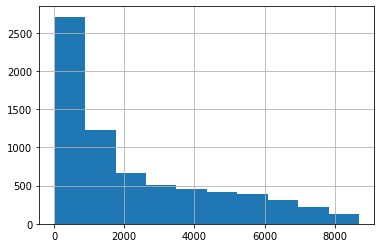

In [18]:
df['TotalCharges'].hist()

Since the distribution of total charges is skewed it's better to not fill the missing values with the mean.
So in that case we will fill the missing value with the median instead of removing them.

In [19]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [20]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [21]:
df.Churn.value_counts()

No     5173
Yes    1869
Name: Churn, dtype: int64

In [22]:
100*df['Churn'].value_counts()/len(df['Churn'])

No     73.459245
Yes    26.540755
Name: Churn, dtype: float64

As we can see the data is imbalanced , class No is 73% and class Yes is 26% of the target variable and that can affect the accurcy of the model in the future, we will balance the data
with oversampling in the further analysis

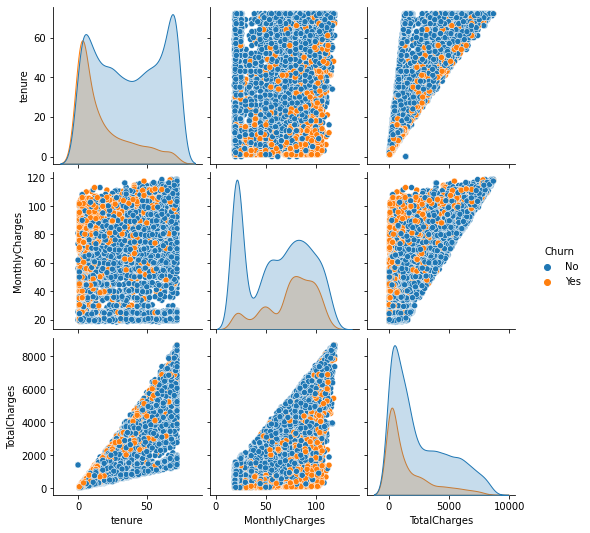

In [23]:
#it keeps ploting Senior citizen in the plot so we can exclude it in the plot  
sns.pairplot(df.drop(columns='SeniorCitizen'),hue='Churn')

This Pairplot here is showing the relashionship between numerical variables and their distributions with 
respect to the target variable, it shows the correlation between variables, for example here as we can see there is a positive correlation between Total charges and tenure as well as monthly charges and totalcharges.
we can see also the distribution of the three variables 

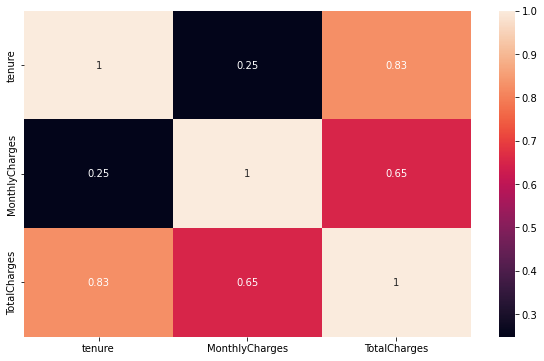

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

<AxesSubplot:xlabel='gender', ylabel='count'>

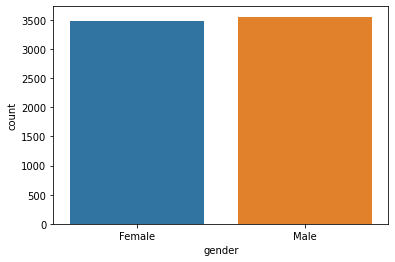

In [25]:
sns.countplot(x=df['gender'])

<AxesSubplot:xlabel='InternetService', ylabel='count'>

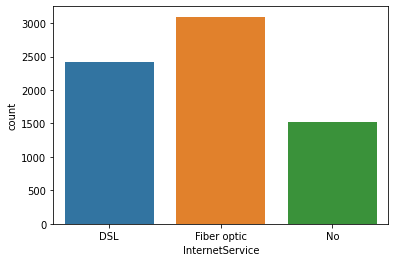

In [26]:
sns.countplot(x=df['InternetService'])

<AxesSubplot:xlabel='Contract', ylabel='count'>

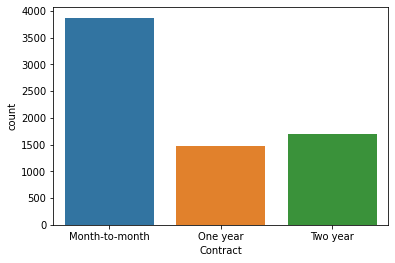

In [27]:
sns.countplot(x=df['Contract'])

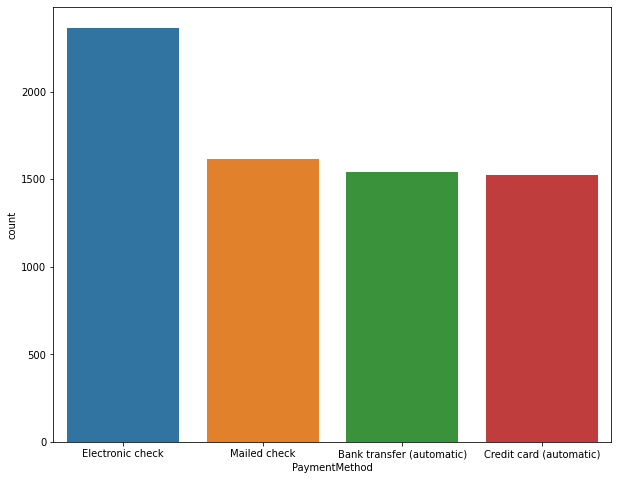

In [28]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['PaymentMethod'])
plt.show()

<AxesSubplot:xlabel='Partner', ylabel='count'>

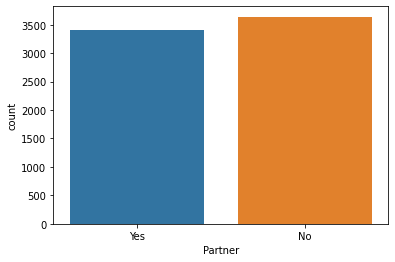

In [29]:
sns.countplot(x=df['Partner'])

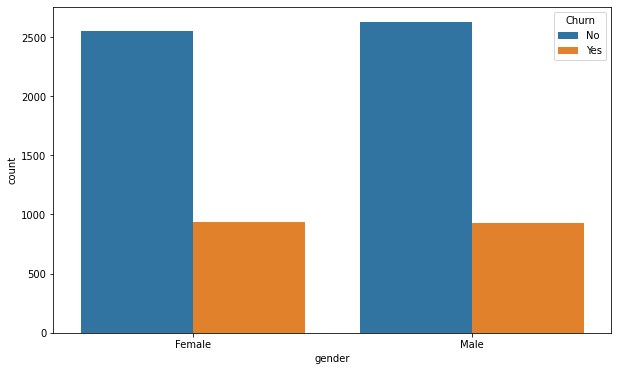

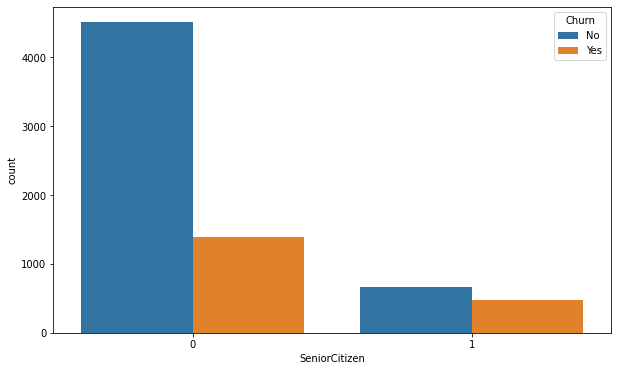

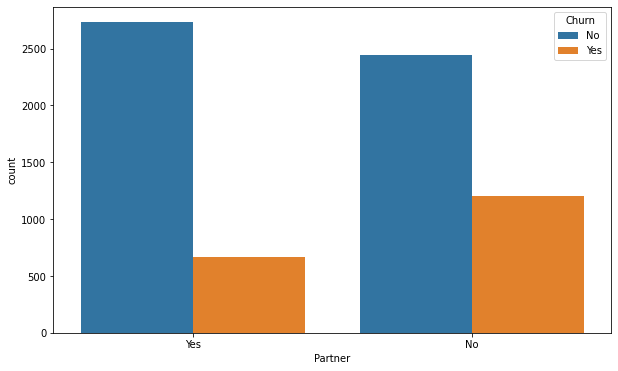

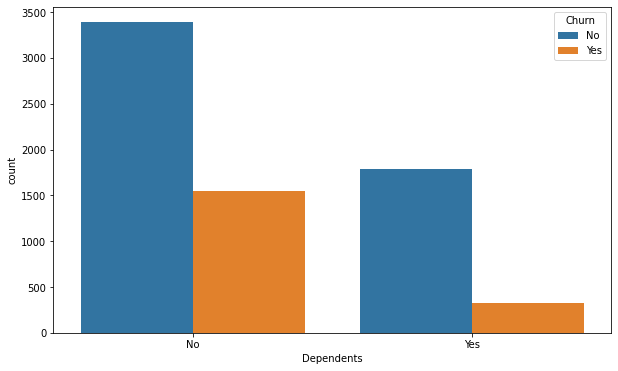

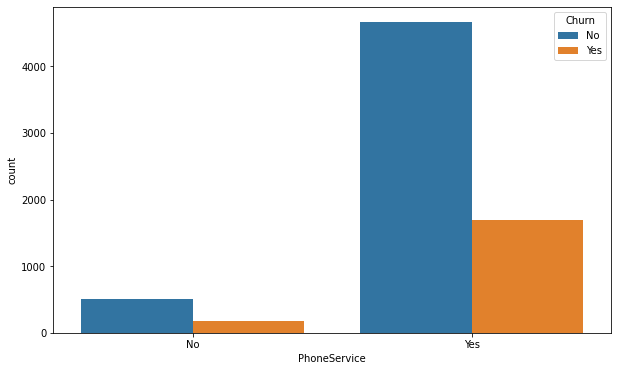

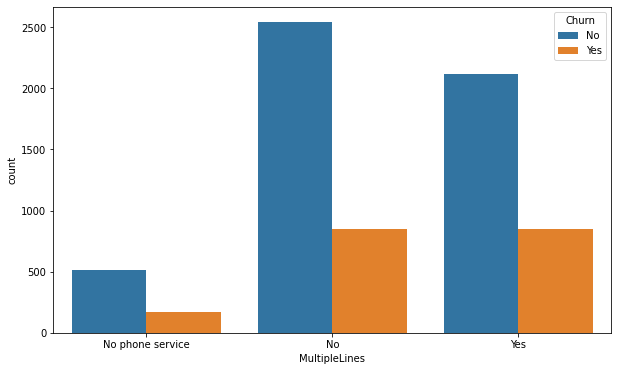

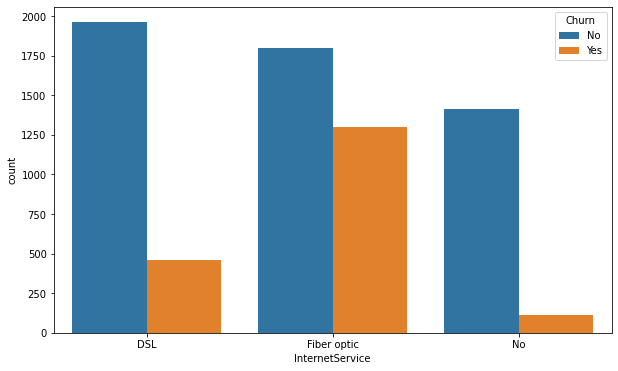

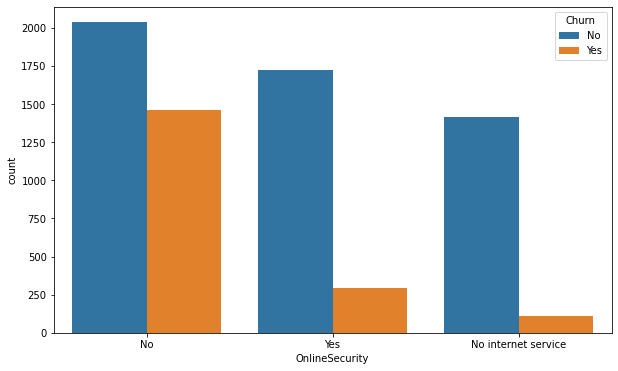

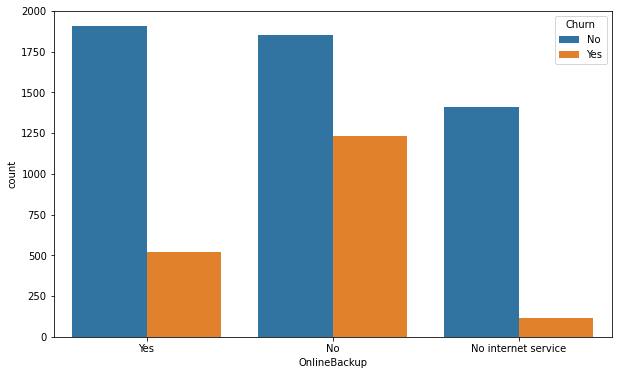

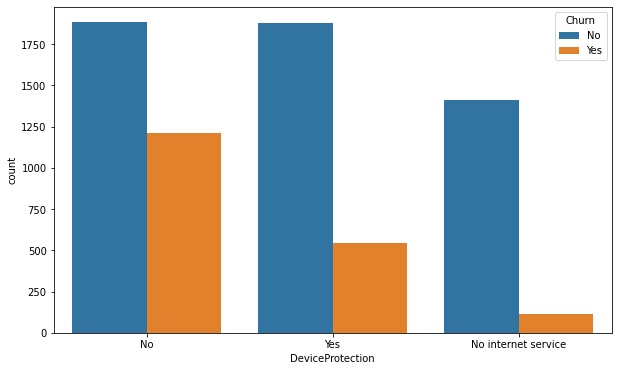

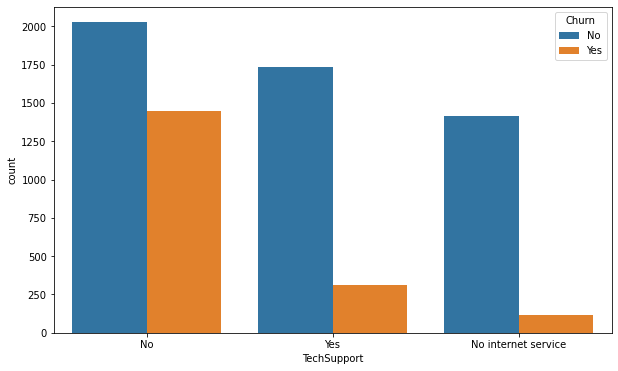

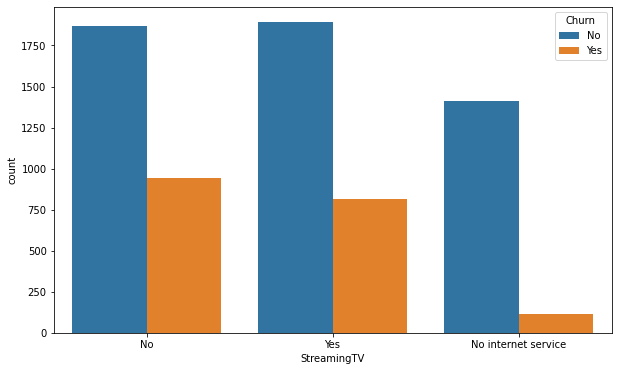

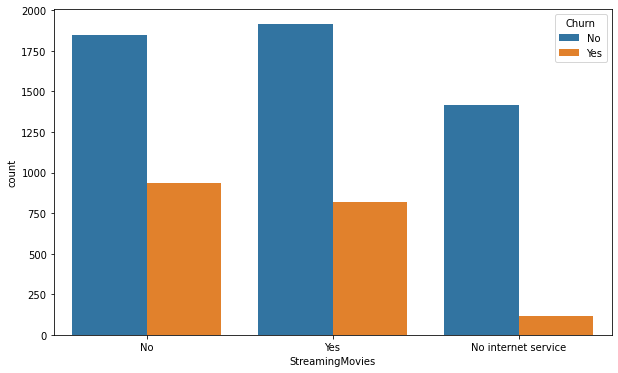

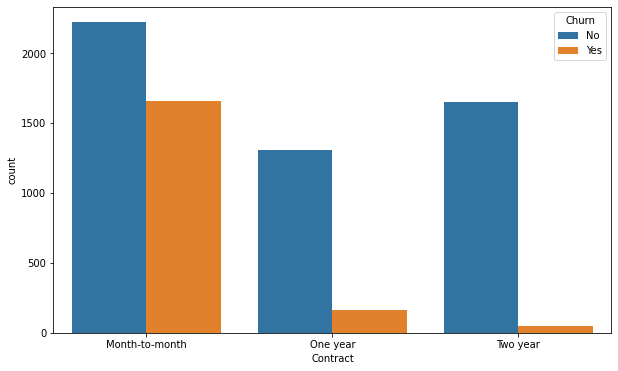

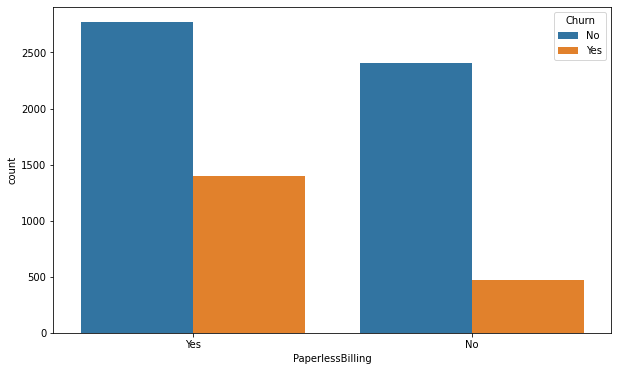

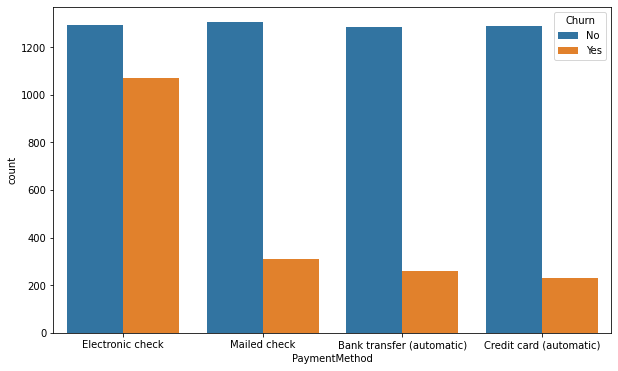

In [30]:
for i, predictor in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges','tenure' ] )):
    plt.figure(i,figsize=(10,6))
    sns.countplot(data=df,x=predictor, hue='Churn')

these Plots can give us a general understanding of which ones are important features to our problem, For example here we have 
in the first countplot [Age] , the ratio is almost similar (50%, 50%) in female and male => We can say that gender is not an important feature in our problem.

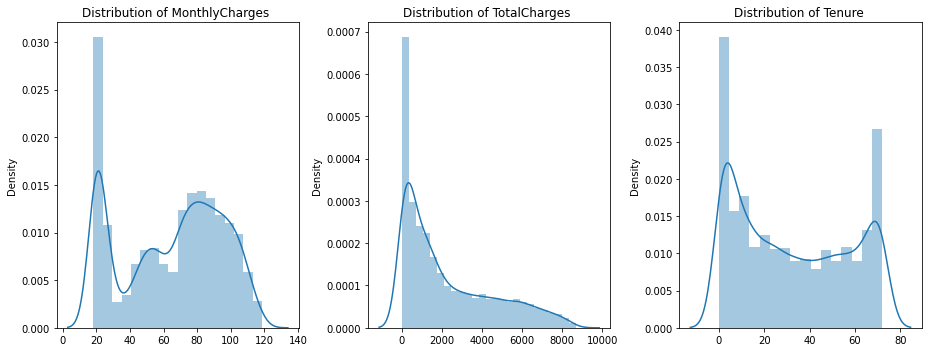

In [31]:
import warnings 
warnings.filterwarnings('ignore')
fig, axs = plt.subplots(nrows =1,ncols=3,figsize=(13,5))
sns.distplot(x=df['MonthlyCharges'], ax=axs[0])
axs[0].set_title('Distribution of MonthlyCharges ')
sns.distplot(x=df['TotalCharges'], ax=axs[1])
axs[1].set_title('Distribution of TotalCharges ')
sns.distplot(x=df['tenure'])
axs[2].set_title('Distribution of Tenure ')
plt.tight_layout()

plt.show()

Total charges is significantly skewed, we can do a data transformation to it 

In [32]:


def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    probplot(df[variable], dist="norm", plot=plt)

    plt.show()



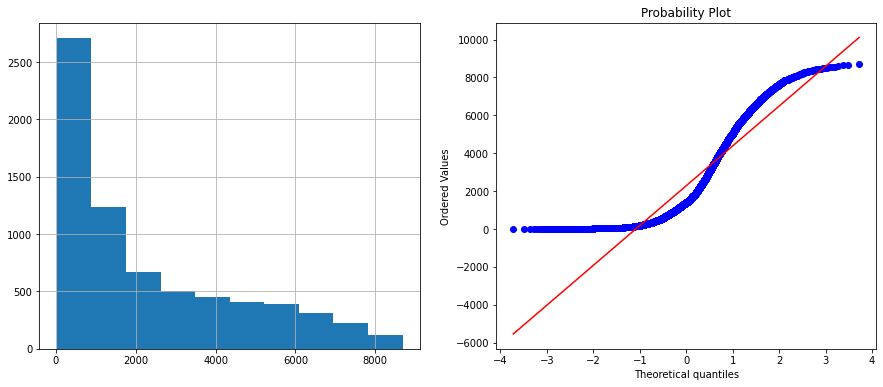

In [33]:
diagnostic_plots(df, 'TotalCharges')

We will keep it this way

In [34]:
for column in df.columns:
    if df[column].dtypes == 'object':
        print('*************************')
        print(column,'\n')
        print(df[column].value_counts())

*************************
gender 

Male      3555
Female    3487
Name: gender, dtype: int64
*************************
SeniorCitizen 

0    5900
1    1142
Name: SeniorCitizen, dtype: int64
*************************
Partner 

No     3641
Yes    3401
Name: Partner, dtype: int64
*************************
Dependents 

No     4933
Yes    2109
Name: Dependents, dtype: int64
*************************
PhoneService 

Yes    6361
No      681
Name: PhoneService, dtype: int64
*************************
MultipleLines 

No                  3390
Yes                 2971
No phone service     681
Name: MultipleLines, dtype: int64
*************************
InternetService 

Fiber optic    3096
DSL            2420
No             1526
Name: InternetService, dtype: int64
*************************
OnlineSecurity 

No                     3498
Yes                    2018
No internet service    1526
Name: OnlineSecurity, dtype: int64
*************************
OnlineBackup 

No                     3087
Yes       

In [35]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [36]:
#column = df.drop(columns=['tenure','MonthlyCharges','SeniorCitizen','TotalCharges'])
columns = df.columns.drop(['tenure','MonthlyCharges','SeniorCitizen','TotalCharges'])
columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [37]:
df_new = pd.get_dummies(df, columns=columns, drop_first = True)

In [38]:
df_new.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [39]:
test = df_new.groupby('Churn_Yes').count()
test.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
Churn_Yes,,,,,,,,,,,,,,,,,,,,,
0,5173,5173,5173,5173,5173,5173,5173,5173,5173,5173,...,5173,5173,5173,5173,5173,5173,5173,5173,5173,5173
1,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,...,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869


In [40]:
X = df_new.drop(columns='Churn_Yes')
y = df_new['Churn_Yes']

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [43]:
print(X_train.shape,X_test.shape)

(5633, 30) (1409, 30)


In [44]:
scaler = MinMaxScaler()
# Fit and transform the feature data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [45]:
print(X_train_scaled.shape, X_test_scaled.shape)

(5633, 30) (1409, 30)


In [46]:
#after we test on scaled data , it seems like without feature scaling the models are able to give better results.

In [47]:
X_train_scaled.max()

1.0

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [49]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [50]:
models = [LogisticRegression(max_iter=1000), SVC(), KNeighborsClassifier(), 
          RandomForestClassifier(random_state=42),DecisionTreeClassifier(max_depth=5)]

print("Print Cross Validation on each algorithm between them in 5 folds")

cross_val = cross_val_score(models[0],X,y,cv=5)
print('Log reg scores ',cross_val)
cross_val_knn = cross_val_score(models[2],X,y,cv=5)
print('KNN scores',cross_val_knn )
cross_val_RF = cross_val_score(models[3],X,y,cv=5)
print('RF scores',cross_val_RF )
cross_val_svc = cross_val_score(models[1],X,y,cv=5)
cross_val_svc
print('SVC scores',cross_val_svc)
cross_val_dt = cross_val_score(models[4],X,y,cv=5)
print('DT scores', cross_val_dt)

Print Cross Validation on each algorithm between them in 5 folds
Log reg scores  [0.80411639 0.80482612 0.78835227 0.80965909 0.80681818]
KNN scores [0.75301632 0.7707594  0.75639205 0.75710227 0.76988636]
RF scores [0.80340667 0.78921221 0.76846591 0.79403409 0.80184659]
SVC scores [0.73456352 0.73456352 0.73508523 0.734375   0.734375  ]
DT scores [0.79559972 0.77785664 0.77414773 0.79403409 0.7890625 ]


In [51]:
df_new.shape

(7042, 31)

In [52]:
param_grid = {'selectkbest__k': range(1,15),
              'selectkbest__score_func': [chi2]}

model = LogisticRegression()

# Define the pipeline to use
pipeline = Pipeline([('selectkbest', SelectKBest()),
                     ('logreg', model)])

# Perform a grid search over the parameter grid using cross-validation
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'selectkbest__k': 11, 'selectkbest__score_func': <function chi2 at 0x0000022D90B88D30>}
Best score: 0.7951363354825288


In [53]:
kbest = SelectKBest(chi2, k=11)
X_train_kbest = kbest.fit_transform(X_train_scaled, y_train)
X_test_kbest = kbest.fit_transform(X_test_scaled, y_test)
selected_features = kbest.get_support(indices=True)
selected_features

array([ 1, 10, 11, 12, 14, 16, 18, 20, 22, 25, 28], dtype=int64)

In [54]:
# just to see the column names

new = df_new.iloc[:,selected_features]

new.columns

Index(['tenure', 'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service',
       'OnlineBackup_No internet service',
       'DeviceProtection_No internet service',
       'TechSupport_No internet service', 'StreamingTV_No internet service',
       'StreamingMovies_No internet service', 'Contract_Two year',
       'PaymentMethod_Electronic check'],
      dtype='object')

In [55]:
X_train_kbest

array([[0.95833333, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.04166667, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.98611111, 0.        , 1.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.01388889, 0.        , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.09722222, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.01388889, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [56]:
knn = KNeighborsClassifier(n_neighbors=5)
lr = LogisticRegression(max_iter=1000)
svm = SVC()
rf = RandomForestClassifier()
nb = GaussianNB()
clf = DecisionTreeClassifier(max_depth=5)

In [57]:
knn.fit(X_train_kbest,y_train)
nb.fit(X_train_kbest,y_train)
lr.fit(X_train_kbest,y_train)
svm.fit(X_train_kbest,y_train)
rf.fit(X_train_kbest,y_train)
clf.fit(X_train_kbest,y_train)

DecisionTreeClassifier(max_depth=5)

In [58]:
print("Knn")
print("Accuracy on train data",knn.score(X_train_kbest,y_train))
print("Accuracy on test data",knn.score(X_test_kbest,y_test))
print("Logistic Regression")
print("Accuracy on train data",lr.score(X_train_kbest,y_train))
print("Accuracy on test data",lr.score(X_test_kbest,y_test))
print("SVM")
print("Accuracy on train data",svm.score(X_train_kbest,y_train))
print("Accuracy on test data",svm.score(X_test_kbest,y_test))
print("RF")
print("Accuracy on train data",rf.score(X_train_kbest,y_train))
print("Accuracy on test data",rf.score(X_test_kbest,y_test))
print("NB")
print("Accuracy on train data",nb.score(X_train_kbest,y_train))
print("Accuracy on test data",nb.score(X_test_kbest,y_test))
print("CLF")
print("Accuracy on train data",clf.score(X_train_kbest,y_train))
print("Accuracy on test data",clf.score(X_test_kbest,y_test))

Knn
Accuracy on train data 0.788744896147701
Accuracy on test data 0.759403832505323
Logistic Regression
Accuracy on train data 0.7954908574471862
Accuracy on test data 0.7885024840312278
SVM
Accuracy on train data 0.7931830285815729
Accuracy on test data 0.7885024840312278
RF
Accuracy on train data 0.8072075270726079
Accuracy on test data 0.7743080198722498
NB
Accuracy on train data 0.5876087342446299
Accuracy on test data 0.5883605393896381
CLF
Accuracy on train data 0.7979762116101544
Accuracy on test data 0.7799858055358411


In [59]:
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score
from sklearn.metrics import confusion_matrix

In [60]:
def plot_confusion(y_test,y_pred):
    confusion = confusion_matrix(y_test,y_pred)
    sns.heatmap(confusion, annot=True, fmt="d")
    plt.xlabel("Predicted Label", fontsize= 12)
    plt.ylabel("True Label", fontsize= 12)
    plt.show()

KNN accuracy: 0.759403832505323
KNN recall: 0.5248041775456919
KNN F1 score: 0.5425101214574899


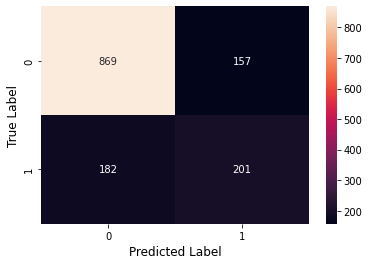

[[869 157]
 [182 201]]


In [61]:
y_pred_knn = knn.predict(X_test_kbest)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_score_KNN = f1_score(y_test, y_pred_knn)

cf = confusion_matrix(y_test, y_pred_knn)
print("KNN accuracy:", accuracy_knn)
print("KNN recall:", recall_knn)
print("KNN F1 score:", f1_score_KNN)
plot_confusion(y_test,y_pred_knn)
print(cf)

LR accuracy: 0.7885024840312278
LR recall: 0.4699738903394256
LR F1 score: 0.5471124620060791


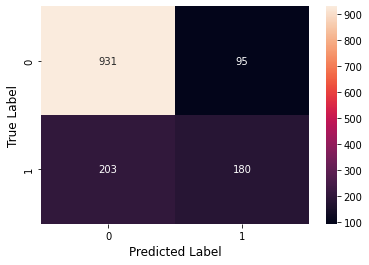

[[931  95]
 [203 180]]


In [62]:
y_pred_lr = lr.predict(X_test_kbest)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_score_lr = f1_score(y_test, y_pred_lr)

cf = confusion_matrix(y_test, y_pred_lr)
print("LR accuracy:", accuracy_lr)
print("LR recall:", recall_lr)
print("LR F1 score:", f1_score_lr)

plot_confusion(y_test,y_pred_lr)
print(cf)

Random Forest accuracy: 0.7743080198722498
Random Forest recall: 0.5013054830287206
Random Forest F1 score: 0.5470085470085471


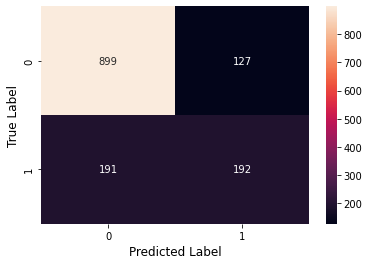

[[931  95]
 [203 180]]


In [63]:
y_pred_random_forest = rf.predict(X_test_kbest)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
recall_random_forest = recall_score(y_test, y_pred_random_forest)
f1_score_random_forest = f1_score(y_test, y_pred_random_forest)

print("Random Forest accuracy:", accuracy_random_forest)
print("Random Forest recall:", recall_random_forest)
print("Random Forest F1 score:", f1_score_random_forest)
plot_confusion(y_test,y_pred_random_forest)
print(cf)

svm: 0.7743080198722498
svm recall: 0.5013054830287206
svm F1 score: 0.5470085470085471


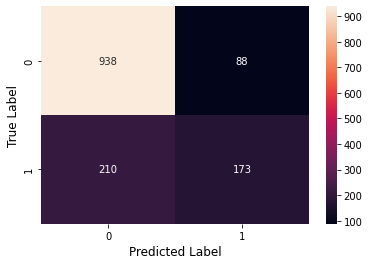

[[931  95]
 [203 180]]


In [64]:
y_pred_svm = svm.predict(X_test_kbest)
accuracy_svm = accuracy_score(y_test, y_pred_random_forest)
recall_svm = recall_score(y_test, y_pred_random_forest)
f1_score_svm = f1_score(y_test, y_pred_random_forest)

print("svm:", accuracy_svm)
print("svm recall:", recall_svm)
print("svm F1 score:", f1_score_svm)
plot_confusion(y_test,y_pred_svm)
print(cf)

In [225]:
X_train_kbest[0]

array([0.95833333, 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [76]:
result =  lr.predict([[0.1, 1.        , 1        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ] ])


if result == 1:
    print("Yes")
else:
    print("No")

Yes


#### searching the best parameters 

In [66]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l2', 'none']}


grid_search = GridSearchCV(lr, param_grid, cv=5)
grid_search.fit(X_train_kbest, y_train)

print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

Best hyperparameters:  {'C': 0.1, 'penalty': 'l2'}
Best accuracy score:  0.7960247501579981


In [67]:
lr2 = LogisticRegression(C=0.1,penalty= 'l2', solver='liblinear')
lr2.fit(X_train_kbest,y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [68]:
print("Logistic Regression")
print("Accuracy on train data",lr2.score(X_train_kbest,y_train))
print("Accuracy on test data",lr2.score(X_test_kbest,y_test))

Logistic Regression
Accuracy on train data 0.7954908574471862
Accuracy on test data 0.7856635911994322


In [69]:
from sklearn.metrics import precision_score


y_pred_lr2 = lr2.predict(X_test_kbest)
accuracy_lr2 = accuracy_score(y_test, y_pred_lr2)
prec_lr2 = precision_score(y_test, y_pred_lr2)
recall_lr2 = recall_score(y_test, y_pred_lr2)
f1_score_lr2 = f1_score(y_test, y_pred_lr2)

cf = confusion_matrix(y_test, y_pred_lr2)
print(cf)
print("LR accuracy:", accuracy_lr2)
print("LR Precision:",prec_lr2 )
print("LR recall:", recall_lr2)
print("LR F1 score:", f1_score_lr2)

[[935  91]
 [211 172]]
LR accuracy: 0.7856635911994322
LR Precision: 0.6539923954372624
LR recall: 0.4490861618798956
LR F1 score: 0.5325077399380804


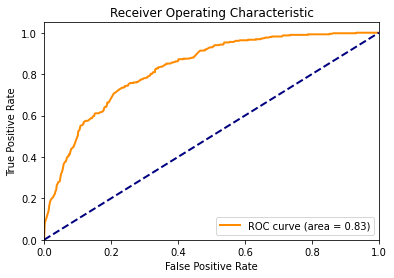

In [70]:
from sklearn.metrics import roc_curve, auc

y_score = lr2.predict_proba(X_test_kbest)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score) #ROC curve
roc_auc = auc(fpr, tpr) # area under the ROC curve

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [71]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    lr2, X_train_kbest, y_train, cv=5, scoring='accuracy', n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.title("Learning Curve (Logistic Regression)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")
plt.legend(loc="best")
plt.show()

In [72]:
result =  lr2.predict([[0.95833333, 1 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ]])

if result == 1:
    print("Yes")
else:
    print("No")

No


In [74]:
import joblib

joblib.dump(lr2, 'first_model.joblib')

['first_model.joblib']

Now We Will balance the data and see the difference of results 

In [234]:
#!pip install imbalanced-learn

In [242]:
from imblearn.over_sampling import SMOTE



smote = SMOTE(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets


In [249]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=0)

In [250]:
scaler = MinMaxScaler()
# Fit and transform the feature data
X_train_scaled_1 = scaler.fit_transform(X_train_1)
X_test_scaled_1 = scaler.fit_transform(X_test_1)

In [246]:
models = [LogisticRegression(max_iter=1000), SVC(), KNeighborsClassifier(), 
          RandomForestClassifier(random_state=42),DecisionTreeClassifier(max_depth=5)]

print("Print Cross Validation on each algorithm between them in 5 folds")

cross_val = cross_val_score(models[0],X_resampled,y_resampled,cv=5)
print('Log reg scores ',cross_val)
cross_val_knn = cross_val_score(models[2],X_resampled,y_resampled,cv=5)
print('KNN scores',cross_val_knn )
cross_val_RF = cross_val_score(models[3],X_resampled,y_resampled,cv=5)
print('RF scores',cross_val_RF )
cross_val_svc = cross_val_score(models[1],X_resampled,y_resampled,cv=5)
cross_val_svc
print('SVC scores',cross_val_svc)
cross_val_dt = cross_val_score(models[4],X_resampled,y_resampled,cv=5)
print('DT scores', cross_val_dt)

Print Cross Validation on each algorithm between them in 5 folds
Log reg scores  [0.71932367 0.74963751 0.86901885 0.85983567 0.87530208]
KNN scores [0.74830918 0.76123731 0.78153697 0.77380377 0.78927018]
RF scores [0.7294686  0.76655389 0.88158531 0.89801837 0.90768487]
SVC scores [0.66811594 0.65732238 0.63943934 0.67327211 0.66263896]
DT scores [0.73333333 0.74915418 0.79120348 0.81875302 0.80908652]


In [287]:
param_grid = {'selectkbest__k': range(1,18),
              'selectkbest__score_func': [chi2]}

model = RandomForestClassifier(random_state=42)

# Define the pipeline to use
pipeline = Pipeline([('selectkbest', SelectKBest()),
                     ('logreg', model)])

# Perform a grid search over the parameter grid using cross-validation
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train_1, y_train_1)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'selectkbest__k': 17, 'selectkbest__score_func': <function chi2 at 0x0000016D95DB45E0>}
Best score: 0.8116548276769272


In [285]:
kbest = SelectKBest(chi2, k=19)
X_train_kbest_1 = kbest.fit_transform(X_train_scaled_1, y_train_1)
X_test_kbest_1 = kbest.fit_transform(X_test_scaled_1, y_test_1)
selected_features_1 = kbest.get_support(indices=True)
selected_features_1

array([ 1,  5,  6, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 22, 24, 25, 27,
       28, 29], dtype=int64)

In [286]:
df_new.iloc[:, selected_features_1]

,tenure,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingMovies_No internet service,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,34,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,2,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
3,45,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
4,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
7039,72,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
7040,11,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
7041,4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [269]:
knn.fit(X_train_kbest_1,y_train_1)
nb.fit(X_train_kbest_1,y_train_1)
lr.fit(X_train_kbest_1,y_train_1)
svm.fit(X_train_kbest_1,y_train_1)
rf.fit(X_train_kbest_1,y_train_1)
clf.fit(X_train_kbest_1,y_train_1)

DecisionTreeClassifier(max_depth=5)

In [270]:
print("Knn")
print("Accuracy on train data",knn.score(X_train_kbest_1,y_train_1))
print("Accuracy on test data",knn.score(X_test_kbest_1,y_test_1))
print("Logistic Regression")
print("Accuracy on train data",lr.score(X_train_kbest_1,y_train_1))
print("Accuracy on test data",lr.score(X_test_kbest_1,y_test_1))
print("SVM")
print("Accuracy on train data",svm.score(X_train_kbest_1,y_train_1))
print("Accuracy on test data",svm.score(X_test_kbest_1,y_test_1))
print("RF")
print("Accuracy on train data",rf.score(X_train_kbest_1,y_train_1))
print("Accuracy on test data",rf.score(X_test_kbest_1,y_test_1))
print("NB")
print("Accuracy on train data",nb.score(X_train_kbest_1,y_train_1))
print("Accuracy on test data",nb.score(X_test_kbest_1,y_test_1))
print("CLF")
print("Accuracy on train data",clf.score(X_train_kbest_1,y_train_1))
print("Accuracy on test data",clf.score(X_test_kbest_1,y_test_1))

Knn
Accuracy on train data 0.8471416735708368
Accuracy on test data 0.8076675257731959
Logistic Regression
Accuracy on train data 0.812206572769953
Accuracy on test data 0.814110824742268
SVM
Accuracy on train data 0.8149682408174538
Accuracy on test data 0.814110824742268
RF
Accuracy on train data 0.9268157967412317
Accuracy on test data 0.8160438144329897
NB
Accuracy on train data 0.7816901408450704
Accuracy on test data 0.7909149484536082
CLF
Accuracy on train data 0.804335818834576
Accuracy on test data 0.8131443298969072


['my_model.joblib']

In [271]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l2', 'none']}


grid_search = GridSearchCV(lr, param_grid, cv=5)
grid_search.fit(X_train_kbest_1, y_train_1)

print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

Best hyperparameters:  {'C': 0.1, 'penalty': 'l2'}
Best accuracy score:  0.8104116384322966


In [273]:
lr_final = LogisticRegression( C = '0.1', penalty =  'l2')

In [274]:
import joblib

joblib.dump(lr_final, 'my_model.joblib')

['my_model.joblib']